# Introduction to Data Science Flow

In this session we want to familiarize ourselves with how to go from a dataset and a question to a model that can answer that question using machine learning; specifically Keras. This is squarely in the realm of data science, but as you will see these are techniques that you will want to add into your workflow.

There are five basic steps that we will want to cover:
  1. Initial data exploration
    - visulizations, scatter plots, some dimensionality reduction, etc
  2. Data clean up
    - Organizing the data based on what it will be used for
  3. Model building
    - Making a predictive model based on the data if supervised learning
  4. Model testing
    - Does it actually work? does it generalize? does it need to?
  5. Repeat from step 1 until satisfied

For this work we'll be taking a look at the Fisher Iris dataset. As we go through the notebook I'll point out how to use numpy, matplotlib and keras to accomplish the goals we've set out.

I will _not_ be providing the dataset here. Instead I encourage you to find the Fisher Iris dataset in the wild.

The goal for today is to make a model that can use the features from the Fisher Iris dataset, to predict the species of the iris.

## 1) Initial Data Exploration

Once you find the dataset name it data.tsv. Make sure it is a tab separated file with the following schema

Dataset Order (int, unique), Sepal Length (float), Sepal Width (float), Petal Length (float), Petal Width (float), Class (string)

Next we'll have to load in the file to do some work with it. In python this is easy to do with the _open_ built-in function. It takes as arguments the name of the file and the mode: reading, writing, appending.

Instead of manually closing the file, we will use the _with_ keyword to make a context manager that will automaticall close the file when we're done.

In [37]:
with open('data.tsv') as f:
    lines = f.readlines()

Now that we have all the lines in a list, we can print a line to see what we have:

In [38]:
lines[149]

'150\t5.9\t3\t5.1\t1.8\tvirginica\n'

Now we should clean it up. We won't need the dataset order, so we can throw that away, and we should make our four features into numbers so that we can start plotting. Having the species as a string is fine, but it would be more useful to assing a number to each species.

To do all of these things, I recommend taking a look at the string method _split_. We should be able to split each string along the '\t', so that each line will then be a list. Then we should turn all the features into floats using the _float_ built-in function. This should work if the string looks like a number. Lastly we should turn the strings into integers.

You should implement that yourself.

In [41]:
data = []
for line in lines:
    # Split the string
    parts = line.split("\t")
#     print(parts[5])
    # Go through each of the parts and turn them into floats
    sepal_lenth = float(parts[1])
    sepal_width = float(parts[2])
    petal_length = float(parts[3])
    petal_width = float(parts[4])
    
#     # Make the species name into an integer
    if "setosa" in parts[5] : 
        species = 0
    elif "virginica" in parts[5] : 
        species=1
    else : 
        species=2
    
#     # Append everything into the data list
    data.append( [sepal_lenth, sepal_width, petal_length, petal_width, species] )

NumPy arrays are incredible useful data types (though Pandas data-frames are becoming more and more popular). We will turn the data into a numpy array for easy indexing. Before that we need to import the library into workspace, and give it the short name np

In [42]:
import numpy as np
data = np.array(data)

Now we are ready to do some visulizations. For this we'll use matplotlib's pyplot interface. If you've ever used MATLAB then this will look familiar. Again we need to import this first, and give it a short name (for convenience). When in a jupyter notebook, we also need to insert the magic command _%matplotlib inline_, to make sure that our plots show up in line in our notebook. This substitutes the show command that we would normally have to do.

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

Now we can move on to do some numpy indexing. We index numpy arrays with square brackets []. If the array has more than one dimension, then we can use a comma to index each dimension. What's really nice is that we can use the colon : to fetch all the elements of that dimension.

So for example _array[:,0]_, will fetch all the elements in the first dimension, and then grab the first element from that list. _array[4,:]_ will fetch all the elements of the second dimension, and then grab the fifth element of the first dimension.

Anyways, we want to plot the data, to see what we're dealing with. We'll be doing that using a scatter plot. We want to choose the color of the dot depending on the class.

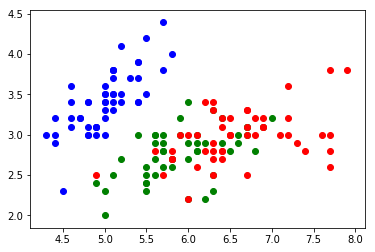

In [141]:
for i in range(data.shape[0]):
    datum = data[i,:]
    if datum[-1]==0:
        color = 'blue'
    elif datum[-1]==1:
        color = 'red'
    elif datum[-1]==2:
        color = 'green'
    else:
        print('There is somehting wrong with your class labels')
        continue
    plt.scatter(datum[0], datum[1], color=color)

You can grab the code above and try to do plots using the other feature combinations. Alternatively you can come up with much shorter code to make the same plots (one way is with numpy fancy mask indexing, or realizing that the data is already orgnized by class).

#### A small aside on how to use jupyter notebooks
You can press _esc_ to enter command mode. In command mode you can do lots in neat things, like copying and pasting entire cells (move to it with the arrows keys, press c, and then v), enter markdown mode (press m) [incidentally, this is how I write these cells], delete celss (press d twice), and many others. The help button has a keyboard shortcuts menu with more.

#### End aside

Now that we have a general idea of what the data looks like, we can start forming some intuition. It is very clear that one of the classes is linearly separable, while the other might not even be non-linearly separable. This is good to know, it sets expectations for what might be possible.

# 2) Data clean up

We've already done some pre-processing to get the data into a plotable format, but depending on what kind of model we want to use we might need to do some more clean up.
Since we're planning on using an MLP, we will want to make the data array X, and the label array Y. These need to have shapes of (number of examples, number of features) for X, and (number of examples, 3) for Y.

After we've done that, we'll actually want to _normalize_ or _whiten_ the data. Normalization is any procedure to constraint the values of the data into a regime that is good for our network. Generally people choose to transform the data so that the smallest value for each feature is 0 and the highest is 1.

Whitening, is a similar idea, but instead, we're looking to have the data have a mean of 0 and a standard deviation of 1 (ie be the stereotypical normal distribution). We can do this using numpy to find the mean and standard deviation of each feature, and then subtracting the mean and dividing by the standard deviation.

For now I'd recommend going with normalization.

For the labels, we actually want to make this into a one-hot encoding. This means that if we have class 0 we want to have the label [1, 0, 0], class 1 label [0, 1, 0] and class 2 label [0, 0, 1]. Keras has functions that can do this for us, but I'll show a naive way of doing the same.

### 2.1) Make the data (X) and label (Y) arrays 

In [136]:
X = data[:,0:4]
Y = data[:,4]

print('The shape of X is {}'.format(X.shape))
print('The shape of Y is {}'.format(Y.shape))

The shape of X is (150, 4)
The shape of Y is (150,)


Notice that the shape is not quite correct for the label array. We can fix this by using the reshape method. So long as the product of the shape dimensions is equal, you can have reshape the array. For example:

z is shape (10,4)
you can reshape it to:
  - (2,5,4)
  - (10, 2, 2)
  - (20,2)
  - (1,10,4)

but not to:
  - (5,16)
  - (3,5,4)
  - (1,1,41)
  
This is just useful to know.

You should always, double check that the array in the new form still has a shape that makes sense to you!
If you understand how C-arrays work, then the re-shaping makes some sense, but always always double check, don't assume!

In [112]:
# ys = []
# for label in Y:
#     if label==0:
#         ys.append([1,0,0])
#     elif label==1:
#         ys.append([0,1,0])
#     elif label==2:
#         ys.append([0,0,1])
#     else:
#         print('Somthing is wrong with your labels!')
#         continue

# Y = np.array(ys)
# print('The shape of Y is {}'.format(Y.shape))

In [138]:
import keras
from keras import utils
if Y.shape != (150,3) :
    Y = utils.to_categorical(Y, num_classes=3)
print('The shape of Y is {}'.format(Y.shape))

The shape of Y is (150, 3)


### 2.2) Normalization

Now we need to normalize our features. For each feature we should find the min, and the max. Then subtract the min from all and then divide the max (if it's not clear why this is true, then pull a sheet of paper and prove it to yourself.)

We can do this for all the features at once! We can ask numpy to find the min and max for each feature, and then using NumPy's broadcasting rules subtract and divide for all.

In [47]:
minimum = np.min(X, axis=0) # We want the first axis (axis=0) to collapse the first dimension
print('The feature-wise min {}'.format(minimum))

The feature-wise min [4.3 2.  1.  0.1]


In [48]:
maximum = np.max(X, axis=0) # We want the first axis (axis=0) to collapse the first dimension
print('The feature-wise max {}'.format(maximum))

The feature-wise max [7.9 4.4 6.9 2.5]


Now we can use broadcasting. When numpy sees you doing math with arrays that are not the same shape, it tries to expand the smaller array to be the same shape as the larger array. It will do this by copying the smaller array over and over. In our case we have the data array with shape (150,4) and the minimum array with shape (4,). Numpy will broadcast the minimum array to (150,4), so we can actually do the arithmetic.

Broadcasting is really useful to save yourself dozens of lines of code, but it sucks when it happens and you don't know! You should always have a mental map of how big your arrays are, and what shapes they have so that you are not surprised!

In [49]:
X = (X - minimum)/maximum

# 3) Model Building

Now we need to start building our predictive model. To do that we will be using Keras. Again we have to import it, but this time we will be importing only the pieces we need. Keras has really good documentation, that I strongly recommened you read at their site [Keras.io](https://www.Keras.io).

In [100]:
from keras.models import Sequential
from keras.layers import Dense

In [101]:
model = Sequential()  # Make the scaffold for a sequential model (go from one layer straight into the next)

# model.add(Dense(10, activation='sigmoid'))


# Add a dense layer (typical NN layer) with ten neurons, and a sigmoid activation function
# For the first layer of each keras model you need to specify what shape the data examples will have
model.add( Dense(5, input_shape=(4,), activation='sigmoid') )

# We can add as many layers as we want using the same syntax.
# After the first layer Keras can auto cast the shapes from one layer to the next
model.add( Dense(5, activation='sigmoid') )

# For our last layer we need to have Dense layer have as many outputs as we need
model.add( Dense(3, activation='softmax') )

We are choosing the softmax activation to normalize the output at the end (the sum of the last array will always be one). This is preparation of using cross entropy as our loss function to force our model to learn a probabily distribution.

After we have our model, we need to _compile_ it. Keras will actually write C++ code for us and compile it. This is usually a 100 fold speed up from raw Python. If you have a GPU and installed the gpu version of tensorflow as your Keras backend you can get an extra 10 to a 100 fold speed up as well.

We have to tell Keras what loss function we will want to minimize and also want optimization algorithm to use. For now we will use the default categorical crossentropy and the stochastic gradient descent. You can always tweak the defaults yourself, or even make your own. We will also ask Keras to keep track of an extra metric: the accuracy. This won't be used for training but it will give us a good sense of how our model is doing.

In [102]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

Now that we have a compiled model we need to train it. To do so we need to provide it data. Keras makes it easy to do this by using the _fit_ method. It is also good practice to have a testing set. This is a set of data that will not be used in the training of the model, but that we will use to see how well the model generalizes. Keras also makes it easy by letting us supply our own testing data, or asking the fit method to split our data into a training and testing set.

In [103]:
hist=model.fit(X,Y, validation_split=0.10, epochs=2000, batch_size=5)

Train on 135 samples, validate on 15 samples
Epoch 1/2000
135/135 [==============================] - 1s 11ms/step - loss: 1.1211 - acc: 0.2593 - val_loss: 1.0094 - val_acc: 1.0000
Epoch 2/2000
135/135 [==============================] - 0s 471us/step - loss: 1.1094 - acc: 0.2889 - val_loss: 1.0716 - val_acc: 1.0000
Epoch 3/2000
135/135 [==============================] - 0s 407us/step - loss: 1.1027 - acc: 0.0963 - val_loss: 1.1222 - val_acc: 0.0000e+00
Epoch 4/2000
135/135 [==============================] - 0s 384us/step - loss: 1.0980 - acc: 0.1704 - val_loss: 1.1641 - val_acc: 0.0000e+00
Epoch 5/2000
135/135 [==============================] - 0s 377us/step - loss: 1.0953 - acc: 0.0593 - val_loss: 1.1974 - val_acc: 0.0000e+00
Epoch 6/2000
135/135 [==============================] - 0s 391us/step - loss: 1.0939 - acc: 0.0741 - val_loss: 1.2203 - val_acc: 0.0000e+00
Epoch 7/2000
135/135 [==============================] - 0s 377us/step - loss: 1.0931 - acc: 0.2519 - val_loss: 1.2404 - val_

Epoch 59/2000
135/135 [==============================] - 0s 332us/step - loss: 1.0842 - acc: 0.0667 - val_loss: 1.3090 - val_acc: 0.0000e+00
Epoch 60/2000
135/135 [==============================] - 0s 384us/step - loss: 1.0845 - acc: 0.0667 - val_loss: 1.3077 - val_acc: 0.0000e+00
Epoch 61/2000
135/135 [==============================] - 0s 362us/step - loss: 1.0844 - acc: 0.0074 - val_loss: 1.3101 - val_acc: 0.0000e+00
Epoch 62/2000
135/135 [==============================] - 0s 362us/step - loss: 1.0848 - acc: 0.1407 - val_loss: 1.3126 - val_acc: 0.0000e+00
Epoch 63/2000
135/135 [==============================] - 0s 362us/step - loss: 1.0837 - acc: 0.0889 - val_loss: 1.3149 - val_acc: 0.0000e+00
Epoch 64/2000
135/135 [==============================] - 0s 355us/step - loss: 1.0845 - acc: 0.2370 - val_loss: 1.3136 - val_acc: 0.0000e+00
Epoch 65/2000
135/135 [==============================] - 0s 362us/step - loss: 1.0848 - acc: 0.0667 - val_loss: 1.3143 - val_acc: 0.0000e+00
Epoch 66/2000

Epoch 117/2000
135/135 [==============================] - 0s 369us/step - loss: 1.0746 - acc: 0.0815 - val_loss: 1.2950 - val_acc: 0.0000e+00
Epoch 118/2000
135/135 [==============================] - 0s 355us/step - loss: 1.0745 - acc: 0.1630 - val_loss: 1.2938 - val_acc: 0.0000e+00
Epoch 119/2000
135/135 [==============================] - 0s 340us/step - loss: 1.0742 - acc: 0.1704 - val_loss: 1.2900 - val_acc: 0.0000e+00
Epoch 120/2000
135/135 [==============================] - 0s 362us/step - loss: 1.0737 - acc: 0.2593 - val_loss: 1.2884 - val_acc: 0.0000e+00
Epoch 121/2000
135/135 [==============================] - 0s 340us/step - loss: 1.0740 - acc: 0.1185 - val_loss: 1.2846 - val_acc: 0.0000e+00
Epoch 122/2000
135/135 [==============================] - 0s 362us/step - loss: 1.0740 - acc: 0.0889 - val_loss: 1.2847 - val_acc: 0.0000e+00
Epoch 123/2000
135/135 [==============================] - 0s 355us/step - loss: 1.0735 - acc: 0.1185 - val_loss: 1.2833 - val_acc: 0.0000e+00
Epoch 

Epoch 175/2000
135/135 [==============================] - 0s 384us/step - loss: 1.0555 - acc: 0.3111 - val_loss: 1.2529 - val_acc: 0.0000e+00
Epoch 176/2000
135/135 [==============================] - 0s 384us/step - loss: 1.0551 - acc: 0.3704 - val_loss: 1.2545 - val_acc: 0.0000e+00
Epoch 177/2000
135/135 [==============================] - 0s 369us/step - loss: 1.0549 - acc: 0.3185 - val_loss: 1.2521 - val_acc: 0.0000e+00
Epoch 178/2000
135/135 [==============================] - 0s 332us/step - loss: 1.0543 - acc: 0.4074 - val_loss: 1.2535 - val_acc: 0.0000e+00
Epoch 179/2000
135/135 [==============================] - 0s 323us/step - loss: 1.0536 - acc: 0.3630 - val_loss: 1.2560 - val_acc: 0.0000e+00
Epoch 180/2000
135/135 [==============================] - 0s 347us/step - loss: 1.0529 - acc: 0.3778 - val_loss: 1.2518 - val_acc: 0.0000e+00
Epoch 181/2000
135/135 [==============================] - 0s 362us/step - loss: 1.0529 - acc: 0.4148 - val_loss: 1.2498 - val_acc: 0.0000e+00
Epoch 

Epoch 233/2000
135/135 [==============================] - 0s 310us/step - loss: 1.0105 - acc: 0.6000 - val_loss: 1.1729 - val_acc: 0.0000e+00
Epoch 234/2000
135/135 [==============================] - 0s 392us/step - loss: 1.0097 - acc: 0.6741 - val_loss: 1.1693 - val_acc: 0.0000e+00
Epoch 235/2000
135/135 [==============================] - 0s 377us/step - loss: 1.0083 - acc: 0.6963 - val_loss: 1.1654 - val_acc: 0.0000e+00
Epoch 236/2000
135/135 [==============================] - 0s 377us/step - loss: 1.0070 - acc: 0.5926 - val_loss: 1.1630 - val_acc: 0.0000e+00
Epoch 237/2000
135/135 [==============================] - 0s 355us/step - loss: 1.0057 - acc: 0.7333 - val_loss: 1.1647 - val_acc: 0.0000e+00
Epoch 238/2000
135/135 [==============================] - 0s 369us/step - loss: 1.0041 - acc: 0.7259 - val_loss: 1.1646 - val_acc: 0.0000e+00
Epoch 239/2000
135/135 [==============================] - 0s 377us/step - loss: 1.0033 - acc: 0.5778 - val_loss: 1.1587 - val_acc: 0.0000e+00
Epoch 

135/135 [==============================] - 0s 465us/step - loss: 0.8985 - acc: 0.8519 - val_loss: 1.0091 - val_acc: 0.5333
Epoch 292/2000
135/135 [==============================] - 0s 369us/step - loss: 0.8952 - acc: 0.8519 - val_loss: 1.0072 - val_acc: 0.5333
Epoch 293/2000
135/135 [==============================] - 0s 347us/step - loss: 0.8929 - acc: 0.8222 - val_loss: 1.0005 - val_acc: 0.5333
Epoch 294/2000
135/135 [==============================] - 0s 347us/step - loss: 0.8901 - acc: 0.8667 - val_loss: 0.9992 - val_acc: 0.5333
Epoch 295/2000
135/135 [==============================] - 0s 355us/step - loss: 0.8866 - acc: 0.8519 - val_loss: 0.9954 - val_acc: 0.5333
Epoch 296/2000
135/135 [==============================] - 0s 362us/step - loss: 0.8842 - acc: 0.8519 - val_loss: 0.9916 - val_acc: 0.6000
Epoch 297/2000
135/135 [==============================] - 0s 355us/step - loss: 0.8806 - acc: 0.8593 - val_loss: 0.9872 - val_acc: 0.6000
Epoch 298/2000
135/135 [=========================

135/135 [==============================] - 0s 355us/step - loss: 0.6885 - acc: 0.9333 - val_loss: 0.7941 - val_acc: 0.8667
Epoch 351/2000
135/135 [==============================] - 0s 369us/step - loss: 0.6847 - acc: 0.9407 - val_loss: 0.7904 - val_acc: 0.8667
Epoch 352/2000
135/135 [==============================] - 0s 340us/step - loss: 0.6816 - acc: 0.9407 - val_loss: 0.7890 - val_acc: 0.8667
Epoch 353/2000
135/135 [==============================] - 0s 347us/step - loss: 0.6773 - acc: 0.9111 - val_loss: 0.7820 - val_acc: 0.8667
Epoch 354/2000
135/135 [==============================] - 0s 369us/step - loss: 0.6736 - acc: 0.9407 - val_loss: 0.7801 - val_acc: 0.8667
Epoch 355/2000
135/135 [==============================] - 0s 332us/step - loss: 0.6700 - acc: 0.9407 - val_loss: 0.7793 - val_acc: 0.8667
Epoch 356/2000
135/135 [==============================] - 0s 363us/step - loss: 0.6665 - acc: 0.9407 - val_loss: 0.7768 - val_acc: 0.8667
Epoch 357/2000
135/135 [=========================

135/135 [==============================] - 0s 340us/step - loss: 0.5147 - acc: 0.9407 - val_loss: 0.6804 - val_acc: 0.8667
Epoch 410/2000
135/135 [==============================] - 0s 355us/step - loss: 0.5125 - acc: 0.9407 - val_loss: 0.6807 - val_acc: 0.8667
Epoch 411/2000
135/135 [==============================] - 0s 355us/step - loss: 0.5103 - acc: 0.9407 - val_loss: 0.6792 - val_acc: 0.8667
Epoch 412/2000
135/135 [==============================] - 0s 347us/step - loss: 0.5081 - acc: 0.9407 - val_loss: 0.6775 - val_acc: 0.8667
Epoch 413/2000
135/135 [==============================] - 0s 347us/step - loss: 0.5066 - acc: 0.9407 - val_loss: 0.6757 - val_acc: 0.8667
Epoch 414/2000
135/135 [==============================] - 0s 347us/step - loss: 0.5043 - acc: 0.9407 - val_loss: 0.6771 - val_acc: 0.8667
Epoch 415/2000
135/135 [==============================] - 0s 355us/step - loss: 0.5026 - acc: 0.9407 - val_loss: 0.6768 - val_acc: 0.8667
Epoch 416/2000
135/135 [=========================

135/135 [==============================] - 0s 362us/step - loss: 0.4249 - acc: 0.9481 - val_loss: 0.6225 - val_acc: 0.8667
Epoch 469/2000
135/135 [==============================] - 0s 377us/step - loss: 0.4237 - acc: 0.9481 - val_loss: 0.6207 - val_acc: 0.8667
Epoch 470/2000
135/135 [==============================] - 0s 355us/step - loss: 0.4224 - acc: 0.9481 - val_loss: 0.6195 - val_acc: 0.8667
Epoch 471/2000
135/135 [==============================] - 0s 332us/step - loss: 0.4213 - acc: 0.9481 - val_loss: 0.6199 - val_acc: 0.8667
Epoch 472/2000
135/135 [==============================] - 0s 355us/step - loss: 0.4202 - acc: 0.9481 - val_loss: 0.6184 - val_acc: 0.8667
Epoch 473/2000
135/135 [==============================] - 0s 355us/step - loss: 0.4193 - acc: 0.9407 - val_loss: 0.6145 - val_acc: 0.8667
Epoch 474/2000
135/135 [==============================] - 0s 362us/step - loss: 0.4186 - acc: 0.9481 - val_loss: 0.6135 - val_acc: 0.8667
Epoch 475/2000
135/135 [=========================

135/135 [==============================] - 0s 340us/step - loss: 0.3681 - acc: 0.9556 - val_loss: 0.5570 - val_acc: 0.9333
Epoch 528/2000
135/135 [==============================] - 0s 406us/step - loss: 0.3669 - acc: 0.9704 - val_loss: 0.5575 - val_acc: 0.9333
Epoch 529/2000
135/135 [==============================] - 0s 316us/step - loss: 0.3660 - acc: 0.9556 - val_loss: 0.5548 - val_acc: 0.9333
Epoch 530/2000
135/135 [==============================] - 0s 335us/step - loss: 0.3652 - acc: 0.9630 - val_loss: 0.5513 - val_acc: 0.9333
Epoch 531/2000
135/135 [==============================] - 0s 362us/step - loss: 0.3644 - acc: 0.9630 - val_loss: 0.5497 - val_acc: 0.9333
Epoch 532/2000
135/135 [==============================] - 0s 361us/step - loss: 0.3638 - acc: 0.9556 - val_loss: 0.5495 - val_acc: 0.9333
Epoch 533/2000
135/135 [==============================] - 0s 340us/step - loss: 0.3627 - acc: 0.9556 - val_loss: 0.5463 - val_acc: 0.9333
Epoch 534/2000
135/135 [=========================

135/135 [==============================] - 0s 384us/step - loss: 0.3210 - acc: 0.9630 - val_loss: 0.4695 - val_acc: 1.0000
Epoch 587/2000
135/135 [==============================] - 0s 406us/step - loss: 0.3204 - acc: 0.9630 - val_loss: 0.4678 - val_acc: 1.0000
Epoch 588/2000
135/135 [==============================] - 0s 406us/step - loss: 0.3196 - acc: 0.9556 - val_loss: 0.4676 - val_acc: 1.0000
Epoch 589/2000
135/135 [==============================] - 0s 347us/step - loss: 0.3185 - acc: 0.9704 - val_loss: 0.4651 - val_acc: 1.0000
Epoch 590/2000
135/135 [==============================] - 0s 355us/step - loss: 0.3182 - acc: 0.9630 - val_loss: 0.4658 - val_acc: 1.0000
Epoch 591/2000
135/135 [==============================] - 0s 355us/step - loss: 0.3173 - acc: 0.9630 - val_loss: 0.4662 - val_acc: 1.0000
Epoch 592/2000
135/135 [==============================] - 0s 355us/step - loss: 0.3164 - acc: 0.9630 - val_loss: 0.4663 - val_acc: 1.0000
Epoch 593/2000
135/135 [=========================

135/135 [==============================] - 0s 495us/step - loss: 0.2805 - acc: 0.9556 - val_loss: 0.3943 - val_acc: 1.0000
Epoch 646/2000
135/135 [==============================] - 0s 561us/step - loss: 0.2798 - acc: 0.9481 - val_loss: 0.3939 - val_acc: 1.0000
Epoch 647/2000
135/135 [==============================] - 0s 377us/step - loss: 0.2792 - acc: 0.9630 - val_loss: 0.3917 - val_acc: 1.0000
Epoch 648/2000
135/135 [==============================] - 0s 333us/step - loss: 0.2785 - acc: 0.9481 - val_loss: 0.3910 - val_acc: 1.0000
Epoch 649/2000
135/135 [==============================] - 0s 502us/step - loss: 0.2779 - acc: 0.9481 - val_loss: 0.3921 - val_acc: 1.0000
Epoch 650/2000
135/135 [==============================] - 0s 539us/step - loss: 0.2771 - acc: 0.9630 - val_loss: 0.3883 - val_acc: 1.0000
Epoch 651/2000
135/135 [==============================] - 0s 465us/step - loss: 0.2767 - acc: 0.9556 - val_loss: 0.3879 - val_acc: 1.0000
Epoch 652/2000
135/135 [=========================

135/135 [==============================] - 0s 340us/step - loss: 0.2465 - acc: 0.9556 - val_loss: 0.3295 - val_acc: 1.0000
Epoch 705/2000
135/135 [==============================] - 0s 369us/step - loss: 0.2460 - acc: 0.9630 - val_loss: 0.3262 - val_acc: 1.0000
Epoch 706/2000
135/135 [==============================] - 0s 384us/step - loss: 0.2456 - acc: 0.9481 - val_loss: 0.3251 - val_acc: 1.0000
Epoch 707/2000
135/135 [==============================] - 0s 362us/step - loss: 0.2450 - acc: 0.9556 - val_loss: 0.3260 - val_acc: 1.0000
Epoch 708/2000
135/135 [==============================] - 0s 347us/step - loss: 0.2444 - acc: 0.9481 - val_loss: 0.3242 - val_acc: 1.0000
Epoch 709/2000
135/135 [==============================] - 0s 347us/step - loss: 0.2439 - acc: 0.9481 - val_loss: 0.3215 - val_acc: 1.0000
Epoch 710/2000
135/135 [==============================] - 0s 369us/step - loss: 0.2437 - acc: 0.9556 - val_loss: 0.3229 - val_acc: 1.0000
Epoch 711/2000
135/135 [=========================

135/135 [==============================] - 0s 318us/step - loss: 0.2189 - acc: 0.9556 - val_loss: 0.2790 - val_acc: 1.0000
Epoch 764/2000
135/135 [==============================] - ETA: 0s - loss: 0.3286 - acc: 0.800 - 0s 347us/step - loss: 0.2186 - acc: 0.9630 - val_loss: 0.2771 - val_acc: 1.0000
Epoch 765/2000
135/135 [==============================] - 0s 355us/step - loss: 0.2186 - acc: 0.9556 - val_loss: 0.2769 - val_acc: 1.0000
Epoch 766/2000
135/135 [==============================] - 0s 436us/step - loss: 0.2176 - acc: 0.9556 - val_loss: 0.2765 - val_acc: 1.0000
Epoch 767/2000
135/135 [==============================] - 0s 377us/step - loss: 0.2169 - acc: 0.9630 - val_loss: 0.2764 - val_acc: 1.0000
Epoch 768/2000
135/135 [==============================] - 0s 340us/step - loss: 0.2167 - acc: 0.9556 - val_loss: 0.2779 - val_acc: 1.0000
Epoch 769/2000
135/135 [==============================] - 0s 320us/step - loss: 0.2161 - acc: 0.9556 - val_loss: 0.2758 - val_acc: 1.0000
Epoch 770/2

135/135 [==============================] - 0s 332us/step - loss: 0.1962 - acc: 0.9630 - val_loss: 0.2425 - val_acc: 1.0000
Epoch 823/2000
135/135 [==============================] - 0s 392us/step - loss: 0.1960 - acc: 0.9630 - val_loss: 0.2411 - val_acc: 1.0000
Epoch 824/2000
135/135 [==============================] - 0s 428us/step - loss: 0.1957 - acc: 0.9630 - val_loss: 0.2401 - val_acc: 1.0000
Epoch 825/2000
135/135 [==============================] - 0s 384us/step - loss: 0.1953 - acc: 0.9630 - val_loss: 0.2380 - val_acc: 1.0000
Epoch 826/2000
135/135 [==============================] - 0s 340us/step - loss: 0.1948 - acc: 0.9704 - val_loss: 0.2414 - val_acc: 1.0000
Epoch 827/2000
135/135 [==============================] - 0s 355us/step - loss: 0.1945 - acc: 0.9630 - val_loss: 0.2407 - val_acc: 1.0000
Epoch 828/2000
135/135 [==============================] - 0s 354us/step - loss: 0.1941 - acc: 0.9630 - val_loss: 0.2400 - val_acc: 1.0000
Epoch 829/2000
135/135 [=========================

135/135 [==============================] - 0s 392us/step - loss: 0.1778 - acc: 0.9704 - val_loss: 0.2101 - val_acc: 1.0000
Epoch 882/2000
135/135 [==============================] - 0s 406us/step - loss: 0.1777 - acc: 0.9704 - val_loss: 0.2115 - val_acc: 1.0000
Epoch 883/2000
135/135 [==============================] - 0s 332us/step - loss: 0.1772 - acc: 0.9630 - val_loss: 0.2103 - val_acc: 1.0000
Epoch 884/2000
135/135 [==============================] - 0s 308us/step - loss: 0.1768 - acc: 0.9630 - val_loss: 0.2090 - val_acc: 1.0000
Epoch 885/2000
135/135 [==============================] - 0s 347us/step - loss: 0.1770 - acc: 0.9630 - val_loss: 0.2097 - val_acc: 1.0000
Epoch 886/2000
135/135 [==============================] - 0s 369us/step - loss: 0.1763 - acc: 0.9630 - val_loss: 0.2082 - val_acc: 1.0000
Epoch 887/2000
135/135 [==============================] - 0s 347us/step - loss: 0.1762 - acc: 0.9704 - val_loss: 0.2089 - val_acc: 1.0000
Epoch 888/2000
135/135 [=========================

135/135 [==============================] - 0s 303us/step - loss: 0.1625 - acc: 0.9704 - val_loss: 0.1910 - val_acc: 1.0000
Epoch 941/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1625 - acc: 0.9704 - val_loss: 0.1899 - val_acc: 1.0000
Epoch 942/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1621 - acc: 0.9704 - val_loss: 0.1870 - val_acc: 1.0000
Epoch 943/2000
135/135 [==============================] - 0s 347us/step - loss: 0.1620 - acc: 0.9704 - val_loss: 0.1863 - val_acc: 1.0000
Epoch 944/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1613 - acc: 0.9704 - val_loss: 0.1843 - val_acc: 1.0000
Epoch 945/2000
135/135 [==============================] - 0s 347us/step - loss: 0.1616 - acc: 0.9704 - val_loss: 0.1843 - val_acc: 1.0000
Epoch 946/2000
135/135 [==============================] - 0s 377us/step - loss: 0.1612 - acc: 0.9704 - val_loss: 0.1839 - val_acc: 1.0000
Epoch 947/2000
135/135 [=========================

135/135 [==============================] - 0s 340us/step - loss: 0.1501 - acc: 0.9704 - val_loss: 0.1696 - val_acc: 1.0000
Epoch 1000/2000
135/135 [==============================] - 0s 399us/step - loss: 0.1500 - acc: 0.9704 - val_loss: 0.1685 - val_acc: 1.0000
Epoch 1001/2000
135/135 [==============================] - 0s 369us/step - loss: 0.1494 - acc: 0.9704 - val_loss: 0.1691 - val_acc: 1.0000
Epoch 1002/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1492 - acc: 0.9704 - val_loss: 0.1697 - val_acc: 1.0000
Epoch 1003/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1494 - acc: 0.9704 - val_loss: 0.1675 - val_acc: 1.0000
Epoch 1004/2000
135/135 [==============================] - 0s 347us/step - loss: 0.1490 - acc: 0.9704 - val_loss: 0.1671 - val_acc: 1.0000
Epoch 1005/2000
135/135 [==============================] - 0s 355us/step - loss: 0.1488 - acc: 0.9704 - val_loss: 0.1665 - val_acc: 1.0000
Epoch 1006/2000
135/135 [==================

135/135 [==============================] - 0s 347us/step - loss: 0.1390 - acc: 0.9704 - val_loss: 0.1578 - val_acc: 1.0000
Epoch 1059/2000
135/135 [==============================] - 0s 325us/step - loss: 0.1389 - acc: 0.9704 - val_loss: 0.1561 - val_acc: 1.0000
Epoch 1060/2000
135/135 [==============================] - 0s 406us/step - loss: 0.1388 - acc: 0.9704 - val_loss: 0.1571 - val_acc: 1.0000
Epoch 1061/2000
135/135 [==============================] - 0s 318us/step - loss: 0.1385 - acc: 0.9704 - val_loss: 0.1556 - val_acc: 1.0000
Epoch 1062/2000
135/135 [==============================] - 0s 332us/step - loss: 0.1385 - acc: 0.9704 - val_loss: 0.1541 - val_acc: 1.0000
Epoch 1063/2000
135/135 [==============================] - 0s 377us/step - loss: 0.1385 - acc: 0.9704 - val_loss: 0.1553 - val_acc: 1.0000
Epoch 1064/2000
135/135 [==============================] - 0s 347us/step - loss: 0.1384 - acc: 0.9704 - val_loss: 0.1559 - val_acc: 1.0000
Epoch 1065/2000
135/135 [==================

135/135 [==============================] - 0s 377us/step - loss: 0.1304 - acc: 0.9704 - val_loss: 0.1393 - val_acc: 1.0000
Epoch 1118/2000
135/135 [==============================] - 0s 369us/step - loss: 0.1302 - acc: 0.9704 - val_loss: 0.1401 - val_acc: 1.0000
Epoch 1119/2000
135/135 [==============================] - 0s 369us/step - loss: 0.1300 - acc: 0.9704 - val_loss: 0.1398 - val_acc: 1.0000
Epoch 1120/2000
135/135 [==============================] - 0s 318us/step - loss: 0.1297 - acc: 0.9704 - val_loss: 0.1397 - val_acc: 1.0000
Epoch 1121/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1293 - acc: 0.9704 - val_loss: 0.1400 - val_acc: 1.0000
Epoch 1122/2000
135/135 [==============================] - 0s 488us/step - loss: 0.1294 - acc: 0.9704 - val_loss: 0.1406 - val_acc: 1.0000
Epoch 1123/2000
135/135 [==============================] - 0s 502us/step - loss: 0.1294 - acc: 0.9704 - val_loss: 0.1415 - val_acc: 1.0000
Epoch 1124/2000
135/135 [==================

135/135 [==============================] - 0s 362us/step - loss: 0.1223 - acc: 0.9704 - val_loss: 0.1348 - val_acc: 1.0000
Epoch 1177/2000
135/135 [==============================] - 0s 406us/step - loss: 0.1224 - acc: 0.9704 - val_loss: 0.1348 - val_acc: 1.0000
Epoch 1178/2000
135/135 [==============================] - 0s 384us/step - loss: 0.1219 - acc: 0.9704 - val_loss: 0.1346 - val_acc: 1.0000
Epoch 1179/2000
135/135 [==============================] - 0s 332us/step - loss: 0.1220 - acc: 0.9704 - val_loss: 0.1332 - val_acc: 1.0000
Epoch 1180/2000
135/135 [==============================] - 0s 325us/step - loss: 0.1219 - acc: 0.9704 - val_loss: 0.1312 - val_acc: 1.0000
Epoch 1181/2000
135/135 [==============================] - 0s 328us/step - loss: 0.1222 - acc: 0.9704 - val_loss: 0.1310 - val_acc: 1.0000
Epoch 1182/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1217 - acc: 0.9704 - val_loss: 0.1307 - val_acc: 1.0000
Epoch 1183/2000
135/135 [==================

135/135 [==============================] - 0s 362us/step - loss: 0.1156 - acc: 0.9704 - val_loss: 0.1240 - val_acc: 1.0000
Epoch 1236/2000
135/135 [==============================] - 0s 384us/step - loss: 0.1157 - acc: 0.9704 - val_loss: 0.1251 - val_acc: 1.0000
Epoch 1237/2000
135/135 [==============================] - 0s 377us/step - loss: 0.1156 - acc: 0.9704 - val_loss: 0.1258 - val_acc: 1.0000
Epoch 1238/2000
135/135 [==============================] - 0s 377us/step - loss: 0.1158 - acc: 0.9704 - val_loss: 0.1262 - val_acc: 1.0000
Epoch 1239/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1155 - acc: 0.9704 - val_loss: 0.1262 - val_acc: 1.0000
Epoch 1240/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1154 - acc: 0.9704 - val_loss: 0.1273 - val_acc: 1.0000
Epoch 1241/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1153 - acc: 0.9704 - val_loss: 0.1265 - val_acc: 1.0000
Epoch 1242/2000
135/135 [==================

135/135 [==============================] - 0s 325us/step - loss: 0.1097 - acc: 0.9704 - val_loss: 0.1162 - val_acc: 1.0000
Epoch 1295/2000
135/135 [==============================] - 0s 369us/step - loss: 0.1101 - acc: 0.9704 - val_loss: 0.1165 - val_acc: 1.0000
Epoch 1296/2000
135/135 [==============================] - 0s 399us/step - loss: 0.1096 - acc: 0.9704 - val_loss: 0.1165 - val_acc: 1.0000
Epoch 1297/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1100 - acc: 0.9704 - val_loss: 0.1183 - val_acc: 1.0000
Epoch 1298/2000
135/135 [==============================] - 0s 347us/step - loss: 0.1096 - acc: 0.9704 - val_loss: 0.1167 - val_acc: 1.0000
Epoch 1299/2000
135/135 [==============================] - 0s 355us/step - loss: 0.1098 - acc: 0.9704 - val_loss: 0.1164 - val_acc: 1.0000
Epoch 1300/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1095 - acc: 0.9704 - val_loss: 0.1147 - val_acc: 1.0000
Epoch 1301/2000
135/135 [==================

135/135 [==============================] - 0s 340us/step - loss: 0.1050 - acc: 0.9704 - val_loss: 0.1125 - val_acc: 1.0000
Epoch 1354/2000
135/135 [==============================] - 0s 340us/step - loss: 0.1050 - acc: 0.9704 - val_loss: 0.1119 - val_acc: 1.0000
Epoch 1355/2000
135/135 [==============================] - 0s 355us/step - loss: 0.1047 - acc: 0.9778 - val_loss: 0.1103 - val_acc: 1.0000
Epoch 1356/2000
135/135 [==============================] - 0s 392us/step - loss: 0.1045 - acc: 0.9704 - val_loss: 0.1106 - val_acc: 1.0000
Epoch 1357/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1046 - acc: 0.9704 - val_loss: 0.1123 - val_acc: 1.0000
Epoch 1358/2000
135/135 [==============================] - 0s 384us/step - loss: 0.1045 - acc: 0.9704 - val_loss: 0.1118 - val_acc: 1.0000
Epoch 1359/2000
135/135 [==============================] - 0s 369us/step - loss: 0.1049 - acc: 0.9704 - val_loss: 0.1125 - val_acc: 1.0000
Epoch 1360/2000
135/135 [==================

135/135 [==============================] - 0s 362us/step - loss: 0.1004 - acc: 0.9704 - val_loss: 0.1041 - val_acc: 1.0000
Epoch 1413/2000
135/135 [==============================] - 0s 355us/step - loss: 0.1004 - acc: 0.9704 - val_loss: 0.1068 - val_acc: 1.0000
Epoch 1414/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1002 - acc: 0.9704 - val_loss: 0.1064 - val_acc: 1.0000
Epoch 1415/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1001 - acc: 0.9704 - val_loss: 0.1065 - val_acc: 1.0000
Epoch 1416/2000
135/135 [==============================] - 0s 362us/step - loss: 0.1005 - acc: 0.9704 - val_loss: 0.1058 - val_acc: 1.0000
Epoch 1417/2000
135/135 [==============================] - 0s 369us/step - loss: 0.1001 - acc: 0.9704 - val_loss: 0.1053 - val_acc: 1.0000
Epoch 1418/2000
135/135 [==============================] - 0s 355us/step - loss: 0.1003 - acc: 0.9704 - val_loss: 0.1063 - val_acc: 1.0000
Epoch 1419/2000
135/135 [==================

135/135 [==============================] - 0s 340us/step - loss: 0.0966 - acc: 0.9704 - val_loss: 0.1010 - val_acc: 1.0000
Epoch 1472/2000
135/135 [==============================] - 0s 340us/step - loss: 0.0969 - acc: 0.9704 - val_loss: 0.0997 - val_acc: 1.0000
Epoch 1473/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0964 - acc: 0.9704 - val_loss: 0.1002 - val_acc: 1.0000
Epoch 1474/2000
135/135 [==============================] - 0s 310us/step - loss: 0.0962 - acc: 0.9704 - val_loss: 0.1027 - val_acc: 1.0000
Epoch 1475/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0961 - acc: 0.9704 - val_loss: 0.1036 - val_acc: 1.0000
Epoch 1476/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0964 - acc: 0.9778 - val_loss: 0.1025 - val_acc: 1.0000
Epoch 1477/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0962 - acc: 0.9704 - val_loss: 0.1022 - val_acc: 1.0000
Epoch 1478/2000
135/135 [==================

135/135 [==============================] - 0s 340us/step - loss: 0.0930 - acc: 0.9778 - val_loss: 0.0983 - val_acc: 1.0000
Epoch 1531/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0933 - acc: 0.9704 - val_loss: 0.0976 - val_acc: 1.0000
Epoch 1532/2000
135/135 [==============================] - 0s 332us/step - loss: 0.0930 - acc: 0.9704 - val_loss: 0.0975 - val_acc: 1.0000
Epoch 1533/2000
135/135 [==============================] - 0s 347us/step - loss: 0.0929 - acc: 0.9704 - val_loss: 0.0989 - val_acc: 1.0000
Epoch 1534/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0927 - acc: 0.9704 - val_loss: 0.0975 - val_acc: 1.0000
Epoch 1535/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0929 - acc: 0.9704 - val_loss: 0.0968 - val_acc: 1.0000
Epoch 1536/2000
135/135 [==============================] - 0s 369us/step - loss: 0.0928 - acc: 0.9704 - val_loss: 0.0949 - val_acc: 1.0000
Epoch 1537/2000
135/135 [==================

135/135 [==============================] - 0s 362us/step - loss: 0.0901 - acc: 0.9778 - val_loss: 0.0942 - val_acc: 1.0000
Epoch 1590/2000
135/135 [==============================] - 0s 377us/step - loss: 0.0900 - acc: 0.9778 - val_loss: 0.0949 - val_acc: 1.0000
Epoch 1591/2000
135/135 [==============================] - 0s 331us/step - loss: 0.0901 - acc: 0.9704 - val_loss: 0.0940 - val_acc: 1.0000
Epoch 1592/2000
135/135 [==============================] - 0s 390us/step - loss: 0.0901 - acc: 0.9778 - val_loss: 0.0922 - val_acc: 1.0000
Epoch 1593/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0901 - acc: 0.9704 - val_loss: 0.0919 - val_acc: 1.0000
Epoch 1594/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0896 - acc: 0.9704 - val_loss: 0.0922 - val_acc: 1.0000
Epoch 1595/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0898 - acc: 0.9778 - val_loss: 0.0941 - val_acc: 1.0000
Epoch 1596/2000
135/135 [==================

135/135 [==============================] - 0s 333us/step - loss: 0.0872 - acc: 0.9704 - val_loss: 0.0884 - val_acc: 1.0000
Epoch 1649/2000
135/135 [==============================] - 0s 325us/step - loss: 0.0870 - acc: 0.9778 - val_loss: 0.0903 - val_acc: 1.0000
Epoch 1650/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0870 - acc: 0.9704 - val_loss: 0.0898 - val_acc: 1.0000
Epoch 1651/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0872 - acc: 0.9704 - val_loss: 0.0904 - val_acc: 1.0000
Epoch 1652/2000
135/135 [==============================] - 0s 347us/step - loss: 0.0870 - acc: 0.9704 - val_loss: 0.0918 - val_acc: 1.0000
Epoch 1653/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0870 - acc: 0.9778 - val_loss: 0.0897 - val_acc: 1.0000
Epoch 1654/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0868 - acc: 0.9778 - val_loss: 0.0878 - val_acc: 1.0000
Epoch 1655/2000
135/135 [==================

Epoch 1707/2000
135/135 [==============================] - 0s 325us/step - loss: 0.0847 - acc: 0.9778 - val_loss: 0.0862 - val_acc: 1.0000
Epoch 1708/2000
135/135 [==============================] - 0s 340us/step - loss: 0.0845 - acc: 0.9778 - val_loss: 0.0856 - val_acc: 1.0000
Epoch 1709/2000
135/135 [==============================] - 0s 369us/step - loss: 0.0846 - acc: 0.9778 - val_loss: 0.0853 - val_acc: 1.0000
Epoch 1710/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0851 - acc: 0.9778 - val_loss: 0.0850 - val_acc: 1.0000
Epoch 1711/2000
135/135 [==============================] - 0s 369us/step - loss: 0.0843 - acc: 0.9778 - val_loss: 0.0868 - val_acc: 1.0000
Epoch 1712/2000
135/135 [==============================] - 0s 347us/step - loss: 0.0845 - acc: 0.9778 - val_loss: 0.0852 - val_acc: 1.0000
Epoch 1713/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0842 - acc: 0.9778 - val_loss: 0.0868 - val_acc: 1.0000
Epoch 1714/2000
135/135 [==

Epoch 1766/2000
135/135 [==============================] - 0s 384us/step - loss: 0.0827 - acc: 0.9704 - val_loss: 0.0865 - val_acc: 1.0000
Epoch 1767/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0822 - acc: 0.9778 - val_loss: 0.0845 - val_acc: 1.0000
Epoch 1768/2000
135/135 [==============================] - 0s 369us/step - loss: 0.0825 - acc: 0.9704 - val_loss: 0.0857 - val_acc: 1.0000
Epoch 1769/2000
135/135 [==============================] - 0s 347us/step - loss: 0.0822 - acc: 0.9778 - val_loss: 0.0862 - val_acc: 1.0000
Epoch 1770/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0824 - acc: 0.9778 - val_loss: 0.0851 - val_acc: 1.0000
Epoch 1771/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0819 - acc: 0.9778 - val_loss: 0.0848 - val_acc: 1.0000
Epoch 1772/2000
135/135 [==============================] - 0s 340us/step - loss: 0.0822 - acc: 0.9778 - val_loss: 0.0843 - val_acc: 1.0000
Epoch 1773/2000
135/135 [==

Epoch 1825/2000
135/135 [==============================] - 0s 332us/step - loss: 0.0808 - acc: 0.9778 - val_loss: 0.0826 - val_acc: 1.0000
Epoch 1826/2000
135/135 [==============================] - 0s 392us/step - loss: 0.0800 - acc: 0.9852 - val_loss: 0.0804 - val_acc: 1.0000
Epoch 1827/2000
135/135 [==============================] - 0s 369us/step - loss: 0.0804 - acc: 0.9778 - val_loss: 0.0807 - val_acc: 1.0000
Epoch 1828/2000
135/135 [==============================] - 0s 369us/step - loss: 0.0804 - acc: 0.9778 - val_loss: 0.0798 - val_acc: 1.0000
Epoch 1829/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0805 - acc: 0.9778 - val_loss: 0.0800 - val_acc: 1.0000
Epoch 1830/2000
135/135 [==============================] - 0s 332us/step - loss: 0.0804 - acc: 0.9704 - val_loss: 0.0804 - val_acc: 1.0000
Epoch 1831/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0801 - acc: 0.9778 - val_loss: 0.0802 - val_acc: 1.0000
Epoch 1832/2000
135/135 [==

Epoch 1884/2000
135/135 [==============================] - 0s 347us/step - loss: 0.0786 - acc: 0.9778 - val_loss: 0.0796 - val_acc: 1.0000
Epoch 1885/2000
135/135 [==============================] - 0s 392us/step - loss: 0.0784 - acc: 0.9778 - val_loss: 0.0792 - val_acc: 1.0000
Epoch 1886/2000
135/135 [==============================] - 0s 347us/step - loss: 0.0781 - acc: 0.9704 - val_loss: 0.0817 - val_acc: 1.0000
Epoch 1887/2000
135/135 [==============================] - 0s 343us/step - loss: 0.0785 - acc: 0.9778 - val_loss: 0.0810 - val_acc: 1.0000
Epoch 1888/2000
135/135 [==============================] - 0s 347us/step - loss: 0.0786 - acc: 0.9778 - val_loss: 0.0811 - val_acc: 1.0000
Epoch 1889/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0784 - acc: 0.9778 - val_loss: 0.0801 - val_acc: 1.0000
Epoch 1890/2000
135/135 [==============================] - 0s 369us/step - loss: 0.0780 - acc: 0.9778 - val_loss: 0.0806 - val_acc: 1.0000
Epoch 1891/2000
135/135 [==

Epoch 1943/2000
135/135 [==============================] - 0s 399us/step - loss: 0.0768 - acc: 0.9778 - val_loss: 0.0776 - val_acc: 1.0000
Epoch 1944/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0765 - acc: 0.9778 - val_loss: 0.0769 - val_acc: 1.0000
Epoch 1945/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0767 - acc: 0.9778 - val_loss: 0.0760 - val_acc: 1.0000
Epoch 1946/2000
135/135 [==============================] - 0s 392us/step - loss: 0.0768 - acc: 0.9778 - val_loss: 0.0756 - val_acc: 1.0000
Epoch 1947/2000
135/135 [==============================] - 0s 355us/step - loss: 0.0765 - acc: 0.9778 - val_loss: 0.0774 - val_acc: 1.0000
Epoch 1948/2000
135/135 [==============================] - 0s 340us/step - loss: 0.0767 - acc: 0.9778 - val_loss: 0.0779 - val_acc: 1.0000
Epoch 1949/2000
135/135 [==============================] - 0s 362us/step - loss: 0.0762 - acc: 0.9778 - val_loss: 0.0760 - val_acc: 1.0000
Epoch 1950/2000
135/135 [==

The trained _fit_ method returns to us a history object with a summary of what happened throughout the training period. We will use this object in the next step.

# 4) Model Testing

Now that we have a trained model we will usually want to look at the training curves: the loss as a function of the epoch.

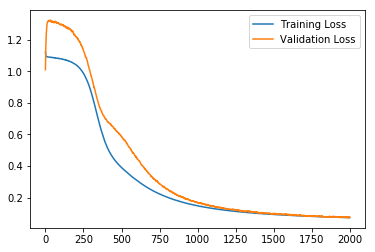

In [104]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend();

With some luck you should see a nice easy decline in the loss. The validation (testing) loss should stay above the training loss; the model is minimizing the training loss, the validation loss going down is a side effect of this.

If you let your model train for long enough you might also start to see overfitting, if your model is large enough.

A good way to do testing is to use K-fold cross validation. You divide your data set into K equal parts, and then grab the first part and make it your testing set, and train on the other K-1 parts. You then record whatever testing metric you want to keep track of (generally the accuracy). Then you go back and pick the second of the K parts to be the testing and re-train a brand new (unoptimized weights) model with the K-1 parts, record the metric. You repeat until you've picked each of the K parts to be the testing set once.

What this will do is simulate how well the model: optimizes (since you'll have to optimize K times), and generalizes (since the training and testing data are always changing.)

A common K to pick is 10, ie 10-fold cross validation.

An important detail is that you want the testing set to replicate the same distribution of labels as the training set. This is called stratefied K-fold cross validation. If your data has 50:50 split between labels, then should your training set. So it's not enough to pick random splits

You should implement a 5-fold cross validation. Don't worry about it being stratefied for now.

# 5) Repeat

So now we've done all this work... but did it answer our original question? For this data set it should be fairly easy to construct something that generalizes okay-ish to our testing set, but maybe we want to push higher accuracy? At this point we might want to go back to step 1 and make new plots if something else has ocurred to us. Or maybe we will want to clea up the data differently (maybe whiten it this time? how big of an impact will that make?). What if we add more hidden layers? or less? More neurons or less neurons? Should we add regularization? And then obviously we need to rigorously test all this to make sure it is making sense.

Play around!